In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("used_device_data.csv")
df

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [3]:
df.isna().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [4]:
df["weight"].fillna(df["weight"].median(),inplace=True)

In [5]:
df["battery"].fillna(df["battery"].median(),inplace=True)

In [6]:
df["ram"].unique()

array([ 3.  ,  8.  ,  6.  ,  4.  ,  2.  ,  1.  , 12.  ,  0.5 ,  0.25,
        0.03,   nan,  0.02,  1.5 ])

In [7]:
df["internal_memory"].unique()

array([6.400e+01, 1.280e+02, 3.200e+01, 1.600e+01, 2.560e+02, 5.120e+02,
       8.000e+00, 4.000e+00, 5.000e-01, 2.000e-01, 1.000e-01, 6.000e-02,
             nan, 1.024e+03, 2.400e+01, 1.000e-02])

In [8]:
dictr = {3.0 : 32, 
        2.0 : 16,
        1.0 : 8,
        4.0 : 64,
        6.0 : 128,
        8.0 : 256,
        12.0 : 512}

In [9]:
df.internal_memory.fillna(df.ram.map(dictr),inplace=True)
#df.internal_memory.fillna()

In [10]:
dicti = {v: k for k, v in dictr.items()}

In [11]:
df.ram.fillna(df.ram.map(dictr),inplace=True)

In [12]:
df[df['ram'].isnull()]

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
114,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,1020.0,91.3,2020,288,2.729159,2.911263
335,Nokia,Others,5.18,no,no,0.3,0.0,0.10,NaN,1200.0,88.2,2020,327,3.062924,3.689129
2059,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,3000.0,82.6,2016,1023,2.765060,3.657905
2090,Nokia,Others,7.62,no,no,5.0,0.0,0.06,NaN,1200.0,111.4,2013,1001,3.827771,4.605770


In [13]:
df[df['internal_memory'].isnull()]

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
117,Nokia,Others,5.18,yes,no,0.3,0.0,NaN,0.02,1200.0,86.5,2019,234,2.721295,3.688379
2035,Nokia,Others,5.18,no,no,5.0,0.0,NaN,0.03,1020.0,157.0,2019,501,2.343727,3.420346
2064,Nokia,Others,5.18,no,no,0.3,0.0,NaN,0.02,1100.0,78.4,2015,559,2.587012,3.378611
2092,Nokia,Others,7.62,no,no,5.0,0.0,NaN,0.02,1010.0,100.0,2013,1043,3.535728,4.370586


In [14]:
df.fillna(method='ffill',inplace=True)
df.isna().sum()

device_brand             0
os                       0
screen_size              0
4g                       0
5g                       0
rear_camera_mp           0
front_camera_mp          0
internal_memory          0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [15]:
df.release_year.unique()

array([2020, 2019, 2013, 2014, 2016, 2018, 2015, 2017], dtype=int64)

In [16]:
df.screen_size.describe()

count    3454.000000
mean       13.713115
std         3.805280
min         5.080000
25%        12.700000
50%        12.830000
75%        15.340000
max        30.710000
Name: screen_size, dtype: float64

In [17]:
#f["screen_size"]=pd.cut(df['screen_size'],bins=5, labels=[5,4,3,2,1])

<AxesSubplot: xlabel='screen_size', ylabel='normalized_used_price'>

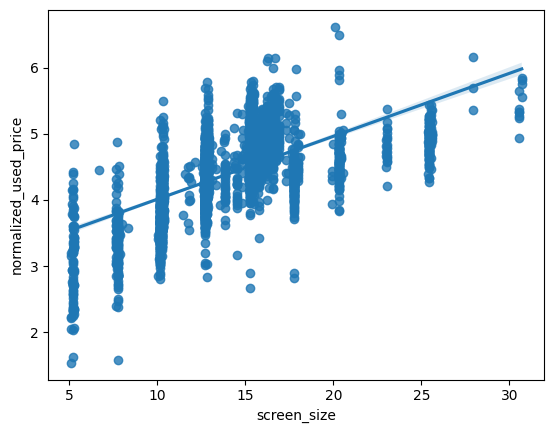

In [18]:
sns.regplot(data=df,x= "screen_size", y="normalized_used_price")

In [19]:
df["battery"].describe()

count    3454.000000
mean     3133.170961
std      1298.565062
min       500.000000
25%      2100.000000
50%      3000.000000
75%      4000.000000
max      9720.000000
Name: battery, dtype: float64

In [20]:
#df["battery"]=pd.cut(df['battery'],bins=11)
#df["battery"]

<AxesSubplot: xlabel='battery', ylabel='normalized_used_price'>

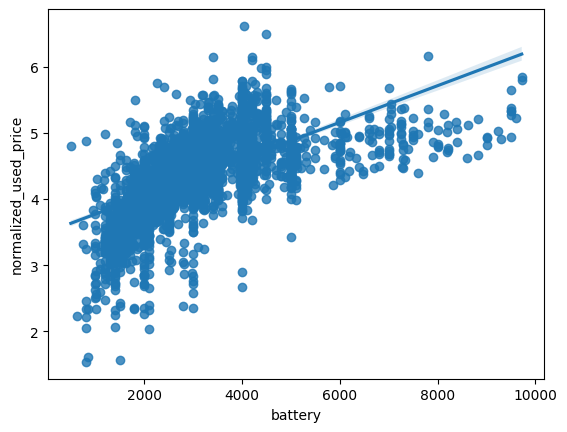

In [21]:
sns.regplot(df, x="battery", y="normalized_used_price")

<AxesSubplot: xlabel='days_used', ylabel='normalized_used_price'>

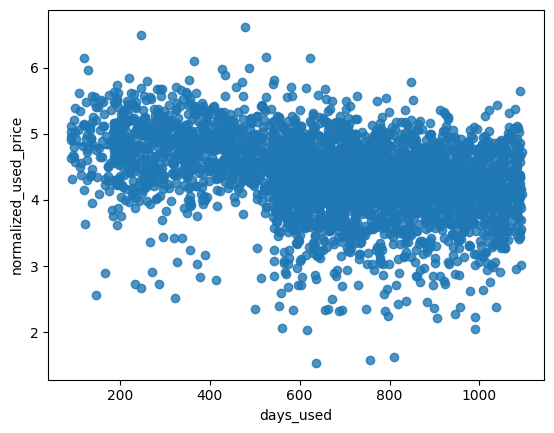

In [22]:
sns.regplot(df, x="days_used", y="normalized_used_price")

<AxesSubplot: xlabel='internal_memory', ylabel='normalized_used_price'>

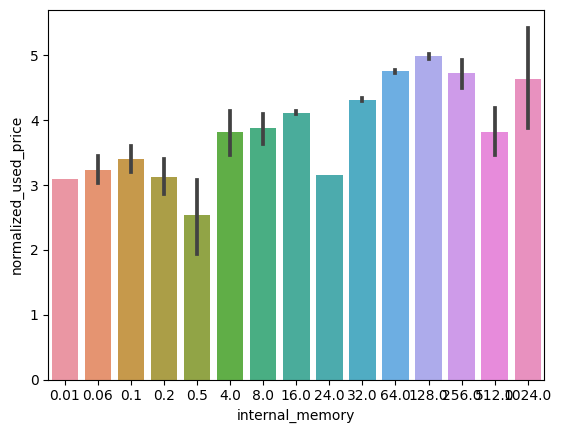

In [23]:
sns.barplot(df, x="internal_memory", y="normalized_used_price")

<AxesSubplot: xlabel='ram', ylabel='normalized_used_price'>

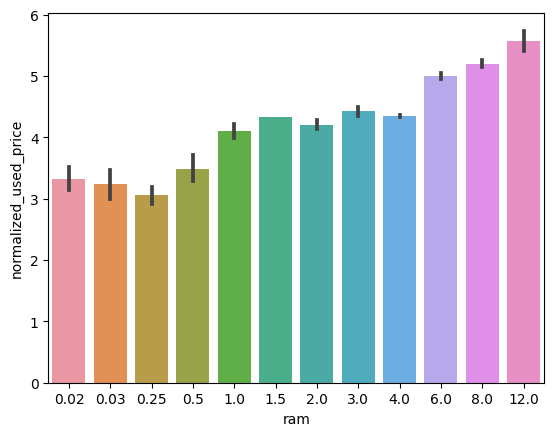

In [24]:
sns.barplot(df, x="ram", y="normalized_used_price")

<AxesSubplot: xlabel='os', ylabel='normalized_used_price'>

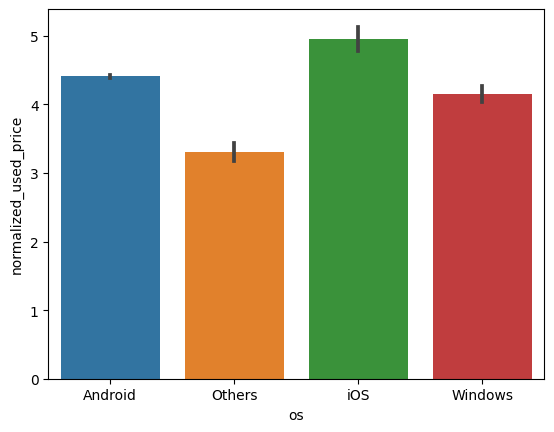

In [25]:
sns.barplot(df, x="os", y="normalized_used_price")

In [26]:
features={'screen_size','4g','5g','internal_memory','ram','battery','days_used','normalized_new_price','rear_camera_mp','front_camera_mp' } 


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['4g']=le.fit_transform(df['4g'])
df['5g']=le.fit_transform(df['5g'])
df

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,1,0,8.0,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,1,0,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,1,0,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,1,0,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [29]:
df1 =df[features]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df1)
df_st = scaler.transform(df1)
df_std = pd.DataFrame(df_st, columns=df1.columns)
df_std

C:\Users\joyal\AppData\Local\Temp\ipykernel_12712\2417427072.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df1 =df[features]


,screen_size,5g,battery,rear_camera_mp,days_used,front_camera_mp,normalized_new_price,internal_memory,4g,ram
0,0.206818,-0.214552,-0.087163,0.761119,-2.204315,-0.222571,-0.757832,0.111635,0.692264,-0.756146
1,0.942744,4.660867,0.898683,0.761119,-1.407676,1.355933,0.418281,0.865224,0.692264,2.899002
2,0.782417,4.660867,0.821663,0.761119,-2.063495,0.207930,0.953164,0.865224,0.692264,2.899002
3,3.097957,4.660867,3.170750,0.761119,-1.327208,0.207930,0.582051,0.111635,0.692264,1.436943
4,0.422339,-0.214552,1.437817,0.761119,-1.536426,0.207930,-0.417343,0.111635,0.692264,-0.756146
...,...,...,...,...,...,...,...,...,...,...
3449,0.427595,-0.214552,1.437817,-0.278108,-1.781855,0.207930,1.829839,0.111635,0.692264,1.436943
3450,0.401312,-0.214552,0.667625,0.761119,-0.538615,0.207930,1.489940,0.865224,0.692264,2.899002
3451,0.548498,-0.214552,0.667625,0.761119,-1.906581,-0.222571,-1.030343,-0.265160,0.692264,-0.756146
3452,0.548498,-0.214552,0.667625,0.761119,-2.115800,-0.222571,-0.890834,-0.265160,0.692264,-1.487175


<AxesSubplot: >

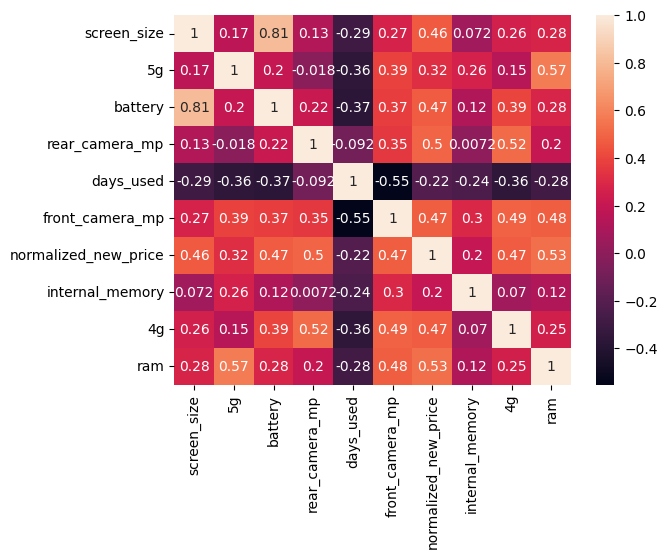

In [30]:
sns.heatmap(df_std.corr(),annot=True)

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_std[features], df['normalized_used_price'], test_size=0.25, random_state=42)

C:\Users\joyal\AppData\Local\Temp\ipykernel_12712\984919654.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  x_train, x_test, y_train, y_test = train_test_split(df_std[features], df['normalized_used_price'], test_size=0.25, random_state=42)


In [32]:
x_train

,screen_size,5g,battery,rear_camera_mp,days_used,front_camera_mp,normalized_new_price,internal_memory,4g,ram
1565,-0.232110,-0.214552,-0.179586,-0.278108,-0.454123,-0.222571,-0.325666,-0.265160,0.692264,-0.025116
3277,0.756134,-0.214552,0.667625,-1.525179,-2.260643,1.355933,-0.142446,0.111635,0.692264,1.436943
3278,0.422339,-0.214552,1.822913,-1.525179,-1.484121,1.355933,0.401169,0.865224,0.692264,-0.025116
1138,-0.266278,-0.214552,-0.641702,-0.278108,1.670247,-0.222571,-0.418278,-0.265160,-1.444536,-0.025116
465,-0.899700,-0.214552,-1.057606,-0.901644,0.604039,-0.897022,-0.127803,-0.453558,-1.444536,-0.025116
...,...,...,...,...,...,...,...,...,...,...
1095,0.461763,-0.214552,-0.087163,0.761119,-1.576660,0.207930,-0.911069,-0.265160,0.692264,-0.025116
1130,-0.232110,-0.214552,-0.102567,0.761119,0.921890,-0.222571,0.089684,-0.265160,0.692264,-0.025116
1294,0.354003,-0.214552,0.667625,0.761119,0.125251,0.207930,0.230642,0.111635,0.692264,-0.025116
860,-0.266278,-0.214552,-0.718721,-0.278108,-0.152366,-0.653072,-0.335748,-0.265160,-1.444536,-0.025116


In [33]:
from sklearn.linear_model  import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred= lr.predict(x_test)

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
print(
  'mean_squared_error : ', mean_squared_error(y_test, y_pred))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred))
print(
  'rscore= : ', r2_score(y_pred,y_test))

mean_squared_error :  0.05491958955392918
mean_absolute_error :  0.18875462557212483
rscore= :  0.7965873066455674


In [35]:
exp= pd.DataFrame([y_pred,y_test]).transpose()

In [36]:
exp.to_csv("Linear.csv")

In [37]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [38]:
from numpy import arange

model = RidgeCV(alphas=arange(0.1, 1, 0.01), scoring='neg_mean_absolute_error')

model.fit(x_train, y_train)

print(model.alpha_)

0.9899999999999995


In [39]:
y_pred= model.predict(x_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
print(
  'mean_squared_error : ', mean_squared_error(y_test, y_pred))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred))
print(
  'rscore= : ', r2_score(y_pred,y_test))

mean_squared_error :  0.054917504189180275
mean_absolute_error :  0.18875000033157252
rscore= :  0.7965327035501775


In [40]:
exp= pd.DataFrame([y_pred,y_test]).transpose()
exp.to_csv("Ridge.csv")

In [42]:
from sklearn.ensemble import RandomForestRegressor
  
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [43]:
y_pred = regressor.predict(x_test)

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
print(
  'mean_squared_error : ', mean_squared_error(y_test, y_pred))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred))
print(
  'rscore= : ', r2_score(y_pred,y_test))

mean_squared_error :  0.05036965670484251
mean_absolute_error :  0.18020064532819433
rscore= :  0.8134538287206546


In [45]:
exp= pd.DataFrame([y_pred,y_test]).transpose()
exp.to_csv("RandomForestRegressor.csv")